# Atividade 1 - Computação Evolucionária

## Gustavo Ribeiro - 2016026329 - gustavo435@ufmg.br
## Hebert Costa - 2016097439 - hebert.costa.jhale@gmail.com

In [49]:
#Bibliotecas
import random as rd
import numpy as np
import pandas as pd
from math import floor
import matplotlib.pyplot as plt
from collections import OrderedDict

### Inicialização da população

In [46]:
def init_population(_mu:int = 20, n:int = 8):
    '''
    -- Evolutionary pressure --
    That is: How the environment conditions presurres species individuals to reinforce characteristics that
    grant necessary adaptiveness.

    For this case it means the least number of checkmates possible.

    This function returns how many checkmates are there in a given solution.
    '''
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

### Variáveis de probabilidade

In [186]:
crossover_rate = 1
mutation_rate = 0.8
interations = 1000

### Função de qualidade das soluções

In [43]:
def fitness_nq(solution):
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques

### Crossover

In [80]:
def crossover(parents):
    '''
        -- Recombination (as it is of 02 inputs it is called 'crossover') --
        That is: Hereditarius characteristics merging, where children characteristics are formed as result of
        parent characteristics merging.


        For this case it means generating a new solution by merging the 02 current best ones and, then permuting
        some genes. 
    '''
    N = len(parents[0])
    filhos = []
    corte = floor(1+8*rd.random()) #Ponto de corte das sequencias dos pais
    #Filhos obtem a primeira parte de cada pai a partir do corte
    filhos.append(parents[0][:corte])
    filhos.append(parents[1][:corte])
    #O restante das sequencias dos filhos são o restante da sequencia do outro pai
    for i in range(0,N):
            check1 = 0
            check2 = 0
            for j in range(0,corte):
                if parents[1][i] == filhos[0][j]:
                    check1 = 1
                if parents[0][i] == filhos[1][j]:
                    check2 = 1
            if check1 == 0:
                filhos[0].append(parents[1][i]) 
            if check2 == 0:
                filhos[1].append(parents[0][i])
    return filhos

### Mutação

In [123]:
#Mutação em que os valores de duas posições são invertidos
def mutation(mutante):
    gen1 = floor(len(mutante)*rd.random())
    gen2 = floor(len(mutante)*rd.random())
    while gen1==gen2:
        gen2 = floor(len(mutante)*rd.random())
    aux = mutante[gen1]
    mutante[gen1] = mutante[gen2]
    mutante[gen2] = aux

### Algoritmo N Rainhas

In [214]:
def n_rainhas(n_populacao:int = 20,n_rainhas:int = 8, prob_cruzamento:float = crossover_rate, prob_mutacao:float = mutation_rate, interacoes:int = interations ):
    #População incializada
    populacao = init_population(n_populacao,n_rainhas)
    
    #Avaliação da população inicial e ordenação
    solucoes = []
    for p in range(len(populacao)):
        solucoes.append([fitness_nq(populacao[p]),populacao[p]])
    solucoes = sorted(solucoes)
    
    #Interações
    melhor_solucao = []
    media_solucao = []
    for i in range(interacoes):
        #Se a melhor solução for uma solução ótima
        if solucoes[0][0] == 0:
            break
        else:
            #Seleção dos pais para cruzamento
            pais = sorted(rd.sample(solucoes,5))[:2]
            
            #Cruzamento entre os pais
            if rd.random()<=prob_cruzamento:
                filhos = crossover([pais[0][1],pais[1][1]])
            else: 
                filhos = [pais[0][1],pais[1][1]]
                
            #Mutação
            if rd.random()<=prob_mutacao:
                mutation(filhos[0])
            if rd.random()<=prob_mutacao:
                mutation(filhos[1])

            #Seleção dos Sobreviventes
            for p in range(len(filhos)):
                solucoes.append([fitness_nq(filhos[p]),filhos[p]])
            solucoes = sorted(solucoes)
            del(solucoes[len(solucoes)-2:])

            #Armazenamento da qualidade da melhor solução e da qualidade média
            melhor_solucao.append(solucoes[0][0])
            valores = []
            for i in solucoes:
                valores.append(i[0])
            media_solucao.append(np.mean(valores))

    return [solucoes[0],melhor_solucao,media_solucao]

## Execução do Algoritmo

### 8 rainhas

Para 8 rainhas, rapidamente o algoritmo achou uma solução ótima. Percebe-se que mesmo que a qualidade da melhor solução tenha estagnado por um tempo em 2, a média da qualidade foi reduzindo.

[0, [6, 1, 5, 2, 0, 3, 7, 4]]


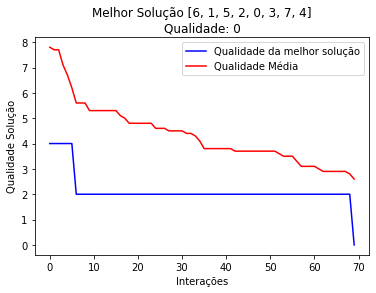

In [183]:
resultado = n_rainhas(20,8)
print(resultado[0])
plt.title('Melhor Solução '+str(resultado[0][1])+'\nQualidade: '+str(resultado[0][0]))
plt.ylabel('Qualidade Solução')
plt.xlabel('Interações')
plt.plot(range(len(resultado[1])),resultado[1],"-b",label ='Qualidade da melhor solução')
plt.plot(range(len(resultado[1])),resultado[2],"-r",label='Qualidade Média')
plt.legend(loc="upper right")

### 20 rainhas

Para 20 rainhas uma solução ótima também foi encontrada, porém demorou bemmais interações para isso. O algoritmo ficou muito tempo preso em uma solução com qualidade 2 ou variando entre soluções com essa qualidade. No final, o passo foi dado para a solução sem xeque-mates. Interassante observar que após um tempo, durante a estagnação na qualidade 2, todas as soluções ficaram com essa qualidade e a aprtir de combinações aleatórias entre esses casos uam solução ótima foi encontrada.

[0, [4, 6, 10, 0, 11, 15, 8, 18, 14, 12, 19, 7, 1, 3, 13, 9, 16, 2, 5, 17]]


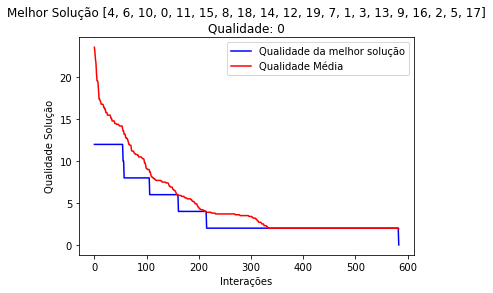

In [184]:
resultado = n_rainhas(20,20)
print(resultado[0])
plt.title('Melhor Solução '+str(resultado[0][1])+'\nQualidade: '+str(resultado[0][0]))
plt.ylabel('Qualidade Solução')
plt.xlabel('Interações')
plt.plot(range(len(resultado[1])),resultado[1],"-b",label ='Qualidade da melhor solução')
plt.plot(range(len(resultado[1])),resultado[2],"-r",label='Qualidade Média')
plt.legend(loc="upper right")

### 50 rainhas
O comportamento para 50 rainhas foi bem próximo do comporamento para 20 rainhas. Porém, para 1000 interações o algoritmo não foi capaz de encontrar uma solução ótima. Porém, para o dobro de interações a solução ótima foi obtida. Isso dependendo do problema pode se tornar computacionalmente inviável, mas para o problema em questão não é.

[4, [10, 2, 43, 40, 15, 13, 25, 22, 34, 7, 48, 46, 3, 27, 9, 17, 8, 4, 31, 35, 41, 18, 42, 32, 1, 11, 49, 0, 24, 36, 39, 20, 14, 45, 12, 38, 26, 37, 44, 33, 23, 29, 5, 28, 16, 21, 30, 6, 47, 19]]


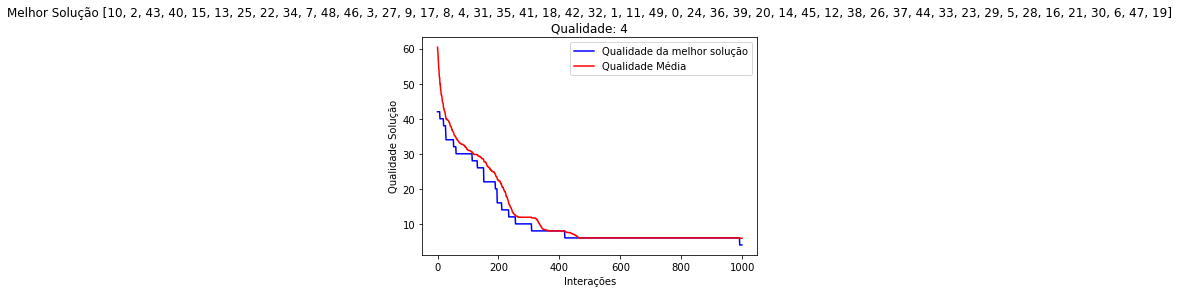

In [185]:
resultado = n_rainhas(20,50)
print(resultado[0])
plt(211)
plt.title('Melhor Solução '+str(resultado[0][1])+'\nQualidade: '+str(resultado[0][0]))
plt.ylabel('Qualidade Solução')
plt.xlabel('Interações')
plt.plot(range(len(resultado[1])),resultado[1],"-b",label ='Qualidade da melhor solução')
plt.plot(range(len(resultado[1])),resultado[2],"-r",label='Qualidade Média')
plt.legend(loc="upper right")

[0, [9, 32, 26, 24, 1, 3, 29, 35, 41, 25, 11, 28, 49, 4, 6, 45, 0, 13, 38, 18, 31, 27, 47, 2, 46, 30, 12, 5, 36, 43, 17, 14, 34, 48, 16, 23, 21, 7, 42, 20, 33, 44, 10, 19, 39, 8, 40, 37, 15, 22]]


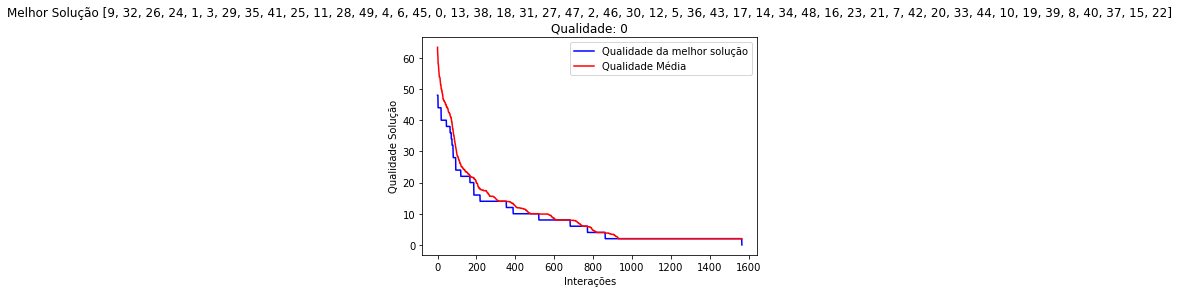

In [197]:
resultado = n_rainhas(n_populacao = 20,n_rainhas=50,interacoes=2000)
print(resultado[0])
plt.title('Melhor Solução '+str(resultado[0][1])+'\nQualidade: '+str(resultado[0][0]))
plt.ylabel('Qualidade Solução')
plt.xlabel('Interações')
plt.plot(range(len(resultado[1])),resultado[1],"-b",label ='Qualidade da melhor solução')
plt.plot(range(len(resultado[1])),resultado[2],"-r",label='Qualidade Média')
plt.legend(loc="upper right")